## The file "loanacceptance.csv" contains various attributes of 500 customers based on which loan has either been granted or denied. You have to create a system that automatically decides whether to grant a loan or not to grant a loan.

### Importing libraries

In [2]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading data file through pandas

In [3]:
def readFileThroughPandas(filename):
    # Reads the entire data file
    data = pd.read_csv(filename)
    
    att = data[["Marital Status","Kids","Annual Household Salary","Loan Amount","Car owner", "Education Level"]]
    lab = data["Loan Granted"]
    
    # Sometimes the dataset needs normalization when the variables are of very different orders of magnitude
    # Normalization is not necessary for decision trees or random forests
    # Standard deviation based normalization
    # att=(att-att.mean())/att.std()
    # Zero-to-One normalization
    # att=(att-att.min())/(att.max()-att.min())
    
    return(att,lab)

In [4]:
(att,lab) = readFileThroughPandas("loanacceptance.csv")

# shape of the variables
print(att.shape)
print(lab.shape)

# Use the first 400 rows for training and the remaining rows for testing

x_train = att.loc[0:400]
y_train = lab.loc[0:400]

x_test = att.loc[400:]
y_test = lab.loc[400:]

# Alternatively use the following code to choose the rows randomly
# x_train, x_test, y_train, y_test = train_test_split(att, lab, test_size = 0.20)

(500, 6)
(500,)


### Fitting a decision tree

In [25]:
# Note that only 80% of the dataset is being used for training
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(max_depth=5)

### Printing performance metrics

In [26]:
# returns accuracy
print("Training accuracy",clf.score(X=x_train,y=y_train))
print("Testing accuracy",clf.score(X=x_test,y=y_test))

y_predicted = clf.predict(x_test)

# Following is an alternative way to get the accuracy scores
# print("Testing accuracy",metrics.accuracy_score(y_test,y_predicted))

Training accuracy 0.9451371571072319
Testing accuracy 0.88


### Always look at the confusion matrix

In [27]:
m = metrics.confusion_matrix(y_test,y_predicted,labels=clf.classes_)
print(m)

[[23  7]
 [ 5 65]]


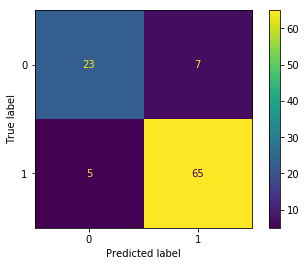

In [28]:
# Better visualization of a confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m,display_labels=clf.classes_)
disp.plot()
plt.show()

### Decision tree visualization

In [29]:
tree_plot_in_text = tree.export_text(clf)
print(tree_plot_in_text)

|--- feature_5 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 752737.00
|   |   |   |--- feature_3 <= 615983.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  615983.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  752737.00
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 358443.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  358443.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_3 <= 6186151.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  6186151.50
|   |   |   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_0 <